In [81]:
import pandas as pd
from iminuit import Minuit 
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#import os
#while not os.getcwd().endswith('Laboratorio_SiPM'):
#   os.chdir('..')

#import sys
#sys.path.append('Config')
#from lablib import *'

In [82]:
def read (file_path):
    return(pd.read_csv(file_path, delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1'))

In [83]:
def cut_df(df: pd.DataFrame, sec: tuple) -> pd.DataFrame:
    """
    Rimuove i dati al di fuori del range definito da sec.
    """
    return df[(df.iloc[:,0] >= sec[0]) & (df.iloc[:,0] <= sec[1])].copy()


In [84]:
def gaussian(X, S, Z, K):
    'K = fattore di scala'
    return(K*(1/(np.sqrt(2*np.pi)*S)*np.exp(-((X-Z)/S)**2)))

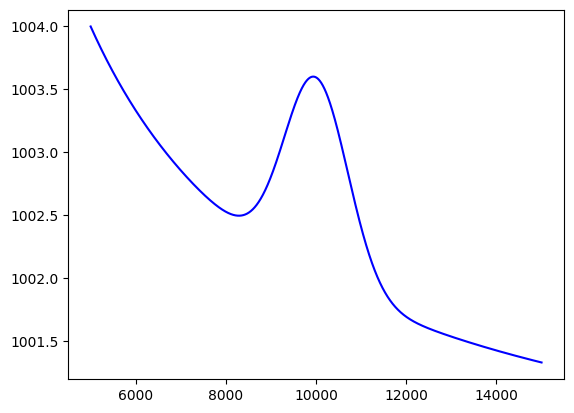

In [85]:
def func_Na (X, S, Z, K, a, c):
    'K e D = fattori di scala'
    return gaussian(X, S, Z, K) + a*X**(-1) + c
'plot per il sodio'

X = np.linspace(5000, 15000, 100000)
Y = func_Na(X, 1000, 10000, 4000, 20000, 1000)
plt.plot(X, Y, label='Sodium', color='blue')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\942828948.py:1: SyntaxWarning: invalid escape sequence '\P'
  B = read('Dati\Parte 2\LySO\Bkg_30min.txt')
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\942828948.py:2: SyntaxWarning: invalid escape sequence '\P'
  C = read('Dati\Parte 2\LySO\Cobalto_30min.txt')
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\942828948.py:3: SyntaxWarning: invalid escape sequence '\P'
  S = read('Dati\Parte 2\LySO\Sodio_30min.txt')
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\12100916.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return(pd.read_cs

<ErrorbarContainer object of 3 artists>

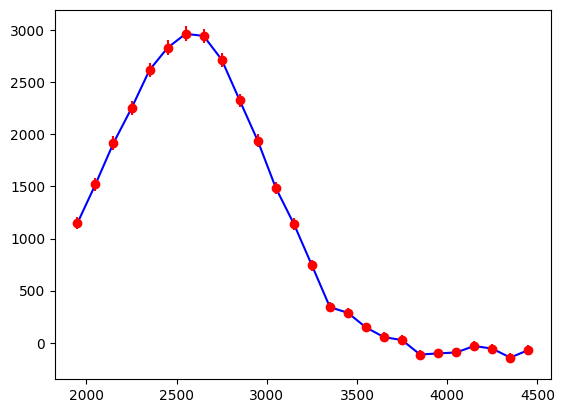

In [86]:
B = read('Dati\Parte 2\LySO\Bkg_30min.txt')
C = read('Dati\Parte 2\LySO\Cobalto_30min.txt')
S = read('Dati\Parte 2\LySO\Sodio_30min.txt')

C_spuro = cut_df(C, (1900, 4500)) 
B_spuro1 = cut_df(B, (1900, 4500))

St = np.sqrt(C_spuro[1] + B_spuro1[1])
C_puro = C_spuro[1] - B_spuro[1]


fig, ax = plt.subplots(nrows = 1, ncols = 1)  
plt.plot(B_spuro1[0], C_puro, label='Cobalto 55.5V', color='blue')
ax.errorbar(B_spuro1[0], C_puro, yerr=St, fmt='o', color='red', label='Cobalto 55.5V')



In [87]:
def analisi_Cobalto(X, Y, St):

    L_S = LeastSquares(X, Y, St, gaussian)
    my_minuit = Minuit (L_S, S = 100, K = 3000, Z = 2500)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#visualizzazione 
    display(my_minuit)

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]
    c_f = my_minuit.values[2]

    print('Deviazione standard: ', a_f)
    print('Fattore di scala: ', c_f)
    print('Posizione picco in ADC counts: ', b_f)


Z = analisi_Cobalto(C_spuro[0], C_puro, St)

Validità:  True
Q-squared:  52.08431951648343
DOF:  23.0
P value:  0.00048716194564391024


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 52.08 (χ²/ndof = 2.3)      │              Nfcn = 137              │
│ EDM = 4.35e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ S    │    592    │     7     │            │            │         │         │       │
│ 1 │ Z    │  2.550e3  │  0.005e3  │            │            │         │         │       │
│ 2 │ K    │  4.44e6   │  0.04e6   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         S         Z         K │
├───┼───────────────────────────────┤
│ S │      45.7        -9  156.53e3 │
│ Z │        -9        23 -42.740e3 │
│ K │  156.53e3 -42.740e3  1.86e+09 │
└───┴───────────────────────────────┘

Deviazione standard:  591.8233836558021
Fattore di scala:  4439756.078466845
Posizione picco in ADC counts:  2549.6334762743536


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\2990150320.py:1: SyntaxWarning: invalid escape sequence '\P'
  B = read('Dati\Parte 2\LySO\Bkg_30min.txt')
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\2990150320.py:2: SyntaxWarning: invalid escape sequence '\P'
  S = read('Dati\Parte 2\LySO\Sodio_30min.txt')
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\12100916.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return(pd.read_csv(file_path, delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1'))
C:\Users\matte\AppData\Local\Temp\ipykernel_14444\12100916.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a fut

<ErrorbarContainer object of 3 artists>

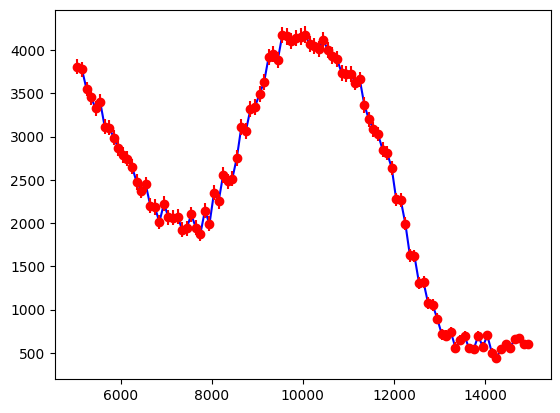

In [88]:
B = read('Dati\Parte 2\LySO\Bkg_30min.txt')
S = read('Dati\Parte 2\LySO\Sodio_30min.txt')

S_spuro = cut_df(S, (5000, 15000)) 
B_spuro2 = cut_df(B, (5000, 15000))

Stat = np.sqrt(S_spuro[1] + B_spuro2[1])
S_puro = S_spuro[1] - B_spuro2[1]

fig, ax  = plt.subplots(nrows = 1, ncols = 1)
plt.plot(B_spuro2[0], S_puro, label='Cobalto 55.5V', color='blue')
ax.errorbar(B_spuro2[0], S_puro, yerr=Stat, fmt='o', color='red', label='Cobalto 55.5V')



In [ ]:
def analisi_Cobalto(X, Y, St):

    L_S = LeastSquares(X, Y, St, func_Na)
    my_minuit = Minuit (L_S, S = 100, K = 4000, Z = 10000, a = 0, c = 0)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#visualizzazione 
    display(my_minuit)

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]
    c_f = my_minuit.values[2]
    d_f = my_minuit.values[3]
    e_f = my_minuit.values[4]

    print('Deviazione standard: ', a_f)
    print('Fattore di scala: ', c_f)
    print('Posizione picco in ADC counts: ', b_f)
    print('Valori del fondo iperbolico, a :', d_f, 'c :', e_f)


Z = analisi_Cobalto(S_spuro[0], S_puro, Stat)

Validità:  True
Q-squared:  581.8681601867993
DOF:  95.0
P value:  0.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 581.9 (χ²/ndof = 6.1)      │              Nfcn = 312              │
│ EDM = 5.96e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ S    │  1.781e3  │  0.015e3  │            │            │         │         │       │
│ 1 │ Z    │ 10.373e3  │  0.011e3  │            │            │         │         │       │
│ 2 │ K    │  14.26e6  │  0.14e6   │            │            │         │         │       │
│ 3 │ a    │  23.60e6  │  0.23e6   │            │            │         │         │       │
│ 4 │ c    │ -1.151e3  │  0.026e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────┐
│   │         S         Z         K         a         c │
├───┼───────────────────────────────────────────────────┤
│ S │       221   -0.01e3 1.40099e6  248.21e3   -0.12e3 │
│ Z │   -0.01e3       117  -24.39e3  803.65e3   -0.09e3 │
│ K │ 1.40099e6  -24.39e3  2.03e+10  0.003e12 -1.4747e6 │
│ a │  248.21e3  803.65e3  0.003e12  5.09e+10 -5.3075e6 │
│ c │   -0.12e3   -0.09e3 -1.4747e6 -5.3075e6       678 │
└───┴───────────────────────────────────────────────────┘

Deviazione standard:  1780.7673565037999
Fattore di scala:  14256229.255366968
Posizione picco in ADC counts:  10373.47051227454
Valori del fondo iperbolico, a : 23604381.910101257 c : -1151.376222686341
